<a href="https://colab.research.google.com/github/keklmaokeklmao/OCR_new/blob/main/Bounding__box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hello world')

hello world


In [ ]:
import tensorflow as tf

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    print("GPU is available.")
else:
    print("GPU is NOT available.")

GPU is NOT available.


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_photo.png to new_photo.png


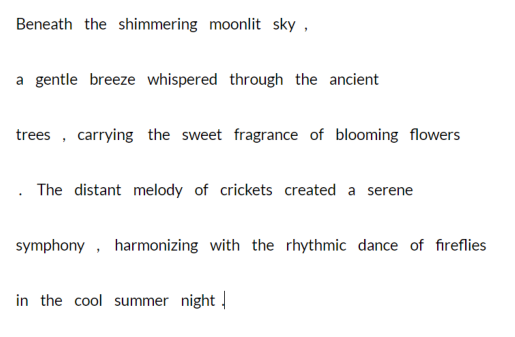

In [ ]:
uploaded_file_name = list(uploaded.keys())[0]
img = cv2.imread(uploaded_file_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

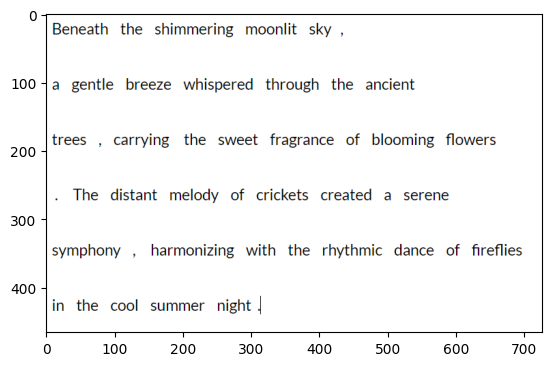

In [ ]:
h, w, c = img.shape

if w > 1000:
    new_w = 1000
    ar = w/h # ar is aspect ratio
    new_h = int(new_w/ar)
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
plt.imshow(img);

##Pre-processing

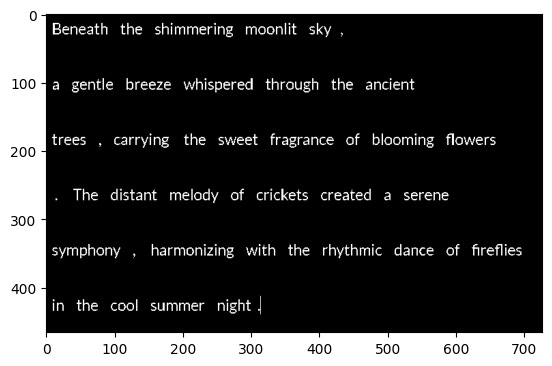

In [ ]:
def thresholding(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray,0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img)

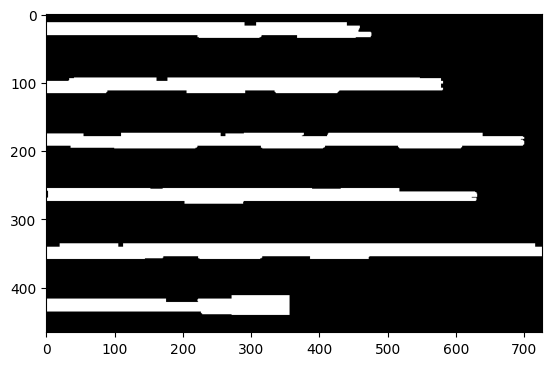

In [ ]:
#dilation
kernel = np.ones((3,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');

In [ ]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

##Line Segmentation

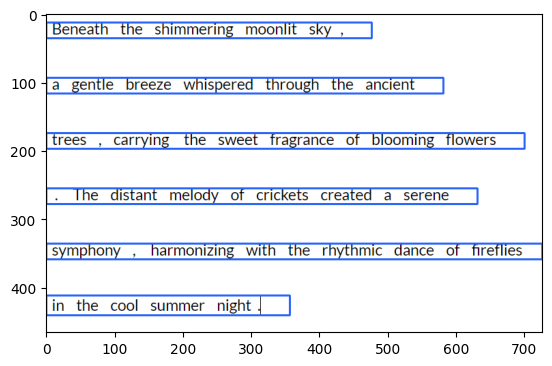

In [ ]:
img2 = img.copy()

for ctr in sorted_contours_lines:

    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2) # these are the colours

plt.imshow(img2);

##Text Segmentation

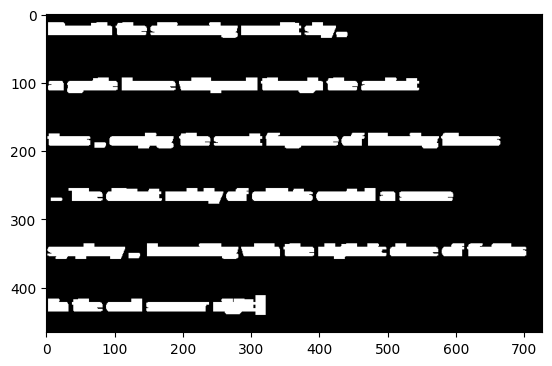

In [ ]:
#dilation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

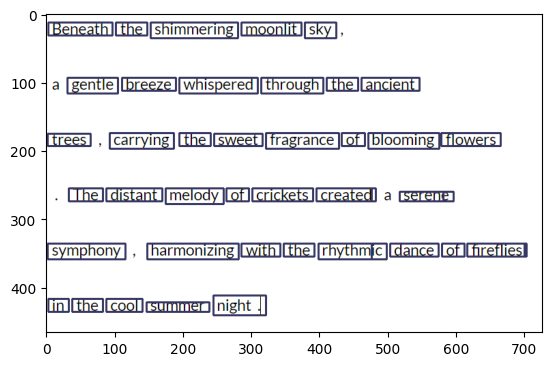

In [ ]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:

    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]

    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])

    for word in sorted_contour_words:

        if cv2.contourArea(word) < 400:
            continue

        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (55,55,100),2)

plt.imshow(img3);

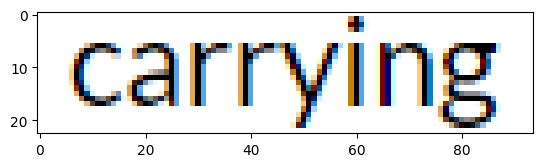

In [ ]:
ninth_word = words_list[9]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

In [ ]:
import os

output_directory = './output_photos'
os.makedirs(output_directory, exist_ok=True)

for i, word_coordinates in enumerate(words_list):
    roi = img[word_coordinates[1]:word_coordinates[3], word_coordinates[0]:word_coordinates[2]]
    output_path = os.path.join(output_directory, f'word_{i + 1}.png')
    cv2.imwrite(output_path, cv2.cvtColor(roi, cv2.COLOR_RGB2BGR))

print(f'All photos saved in: {output_directory}')

All photos saved in: ./output_photos


In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

output_directory = './output_photos'

drive_save_path = '/content/drive/MyDrive/output_photos'

for i, word_coordinates in enumerate(words_list):
    roi = img[word_coordinates[1]:word_coordinates[3], word_coordinates[0]:word_coordinates[2]]
    output_path = os.path.join(output_directory, f'word_{i + 1}.png')
    cv2.imwrite(output_path, cv2.cvtColor(roi, cv2.COLOR_RGB2BGR))  # Save locally first
    !cp {output_path} {drive_save_path}  # Use !cp to execute a shell command

print(f'All photos saved in: {drive_save_path}')

Mounted at /content/drive
All photos saved in: /content/drive/MyDrive/output_photos
